In [1]:
import pandas as pd
import numpy as np
import astropy.units as u
from astropy.constants import hbar, h, c, eps0, e, a0
import matplotlib.pyplot as plt

from sympy.physics.wigner import wigner_3j, wigner_6j

from LightMat import Atom, GaussianBeam, Lattice1d, BowtieLattice2d, LaserSetup

In [2]:
w0 = 175 * u.um
lambda_ = 1064 * u.nm
P = 11 * u.W

bowtie = BowtieLattice2d(
    lattice_direction_vec1=(1,1,0),
    lattice_direction_vec2=(1,-1,0),
    pol_Jones_vec='linear vertical',
    lambda_=lambda_,
    w0=w0,
    P=2*P,
    z0=0,
    name='2d Bowtie x-y',
)

lat1d_x = Lattice1d(
    lattice_direction_vec=(1,1,0),
    intersect_angle=0,
    pol_Jones_vec='linear horizontal', 
    lambda_=lambda_,
    w0=w0,
    P=P,
    z0=0,
    name='1D Lattice x',
)
lat1d_y = Lattice1d(
    lattice_direction_vec=(1,-1,0),
    intersect_angle=0,
    pol_Jones_vec='linear horizontal', 
    lambda_=lambda_,
    w0=w0,
    P=P,
    z0=0,
    name='1D Lattice y',
)

/home/lelo/Dokumente/lightmat/LightMat/light/laser.py:150: RuntimeWarning: invalid value encountered in divide
  return pol / np.linalg.norm(pol)


In [3]:
w0_z = 50 * u.um
lambda_z = 866 * u.nm
P_z = 0.5 * u.W
angle = 165

lat1d_z = Lattice1d(   
    lattice_direction_vec=(0,0,1),
    intersect_angle=angle,
    pol_Jones_vec='linear horizontal',
    lambda_=lambda_z,
    w0=w0_z,
    P=P_z,
    z0=0,
    name='1D Shallow-angle Lattice z',
)

In [ ]:
lat1d_z.E(1, 1, 1)

<Quantity 361548.42863295 V / m>

In [ ]:
print(lat1d_z.beams[0].beam_direction_vec)
print(lat1d_z.beams[1].beam_direction_vec)

[0.         0.99144486 0.13052619]
[-0.          0.99144486 -0.13052619]


In [ ]:
lat1d_z.beams[1].pol_vec_3d

array([1., 0., 0.])

In [ ]:
lat1d_z.E_vec(1,1,1)

<Quantity [221844.98373904-285485.67290984j,
                0.             +0.j        ,
                0.             +0.j        ] V / m>

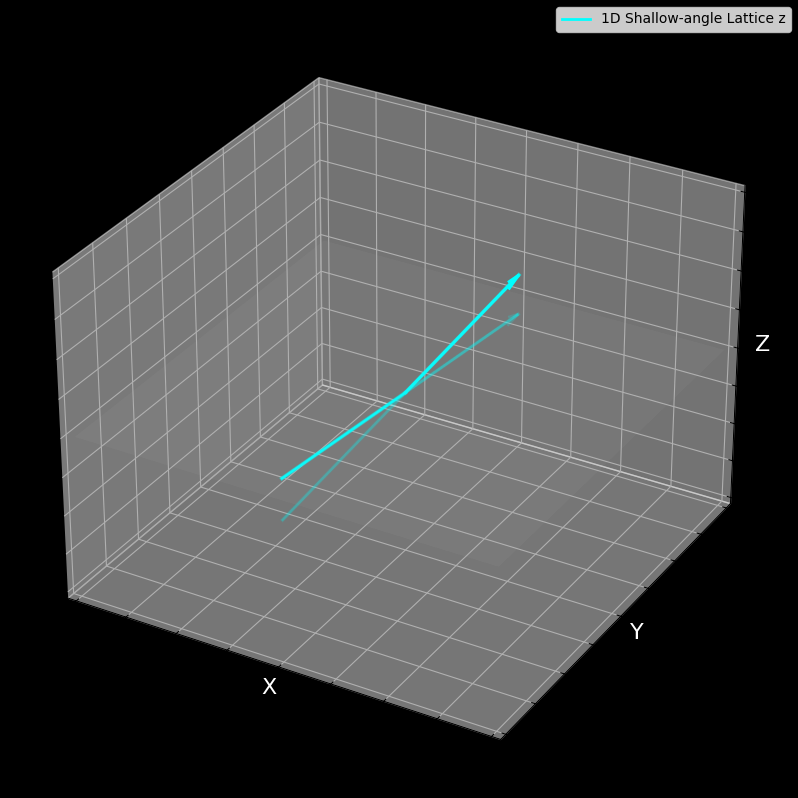

In [ ]:
setup = LaserSetup(lat1d_z)
setup.plot_beams()

In [ ]:
w0_ls = [300, 10] * u.um
lambda_ls = 1064 * u.nm
P_ls = 3 * u.W

lightsheet = GaussianBeam(
    beam_direction_vec=(1,0,0),
    pol_Jones_vec=(1,0), # linear horizontal
    lambda_=lambda_ls,
    w0=w0_ls,
    P=P_ls,
    z0=0,
    name='Light Sheet',
)

In [ ]:
w0_rm = 700 * u.um
lambda_rm = (c / ((c/(770.108385049*u.nm)).to(u.GHz)  - 50*u.GHz)).to(u.nm) # see Tiecke
P_rm1 = 50 * u.mW
P_rm2 = 50 * u.mW


raman1 = GaussianBeam(
    beam_direction_vec=(1,1,-0.2),
    pol_Jones_vec=(1,0), # linear horizontal
    lambda_=lambda_rm,
    w0=w0_rm,
    P=P_rm1,
    z0=0,
    name='Raman 1',
)

raman2 = GaussianBeam(
    beam_direction_vec=(1,-1,-0.2),
    pol_Jones_vec=(1,0), # linear horizontal
    lambda_=lambda_rm,
    w0=w0_rm,
    P=P_rm2,
    z0=0,
    name='Raman 2',
)

In [ ]:
hfs_state = {'n': 4, 'L': 's', 'J': 1/2, 'F': 9/2, 'mF': 4, 'I': 4,}
atom = Atom('K', hfs_state=hfs_state)

In [ ]:
setup_bowtie = LaserSetup(
    lasers=[lat1d_z, lightsheet, raman1, raman2, bowtie,],
    atom=atom,
)

setup_regular = LaserSetup(
    lasers=[lat1d_z, lightsheet, raman1, raman2, lat1d_x, lat1d_y,],
    atom=atom,
)

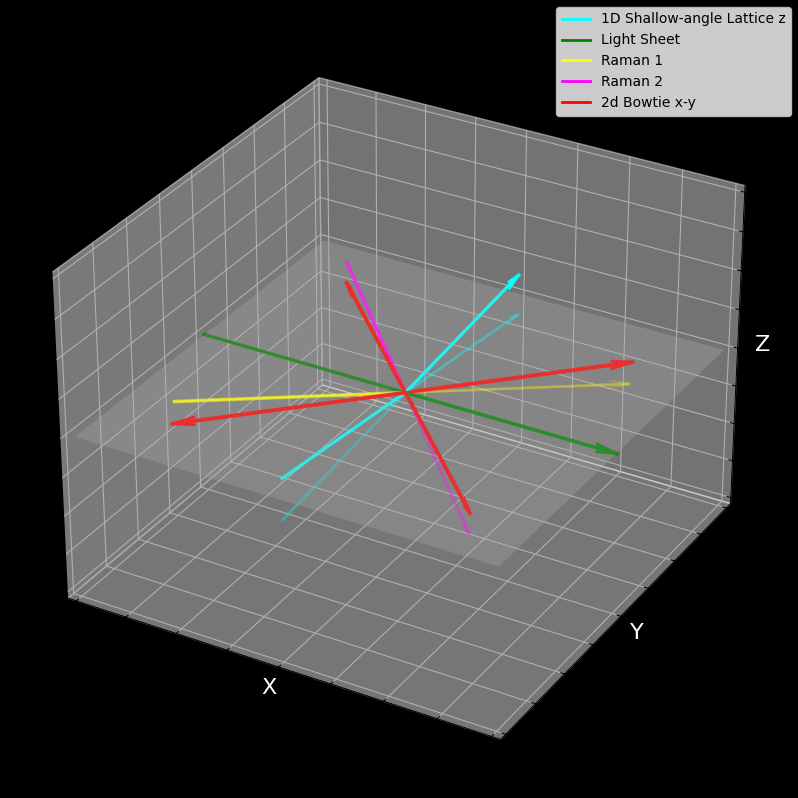

In [ ]:
setup_bowtie.plot_beams()

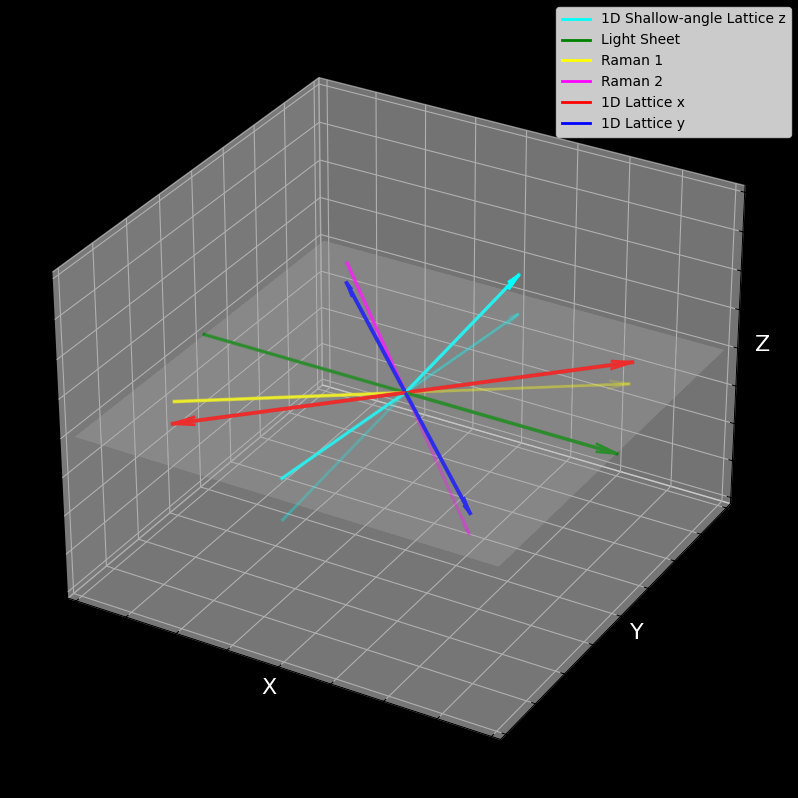

In [ ]:
setup_regular.plot_beams()